In [6]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd
import numpy as np
import keras
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

data = pd.read_csv("data/A_Z Handwritten Data.csv").astype('float32')
#Images
X = data.drop('0', axis = 1)
#Labels
y = data['0']

#Split data randomly into training data and testing data
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2)

#Reshaping the train and test image data from pixel data to 28x28 pixels -
#so we can display it as images. (3D array)
train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))
print("Train data shape: ", train_x.shape)
print("Test data shape: ", test_x.shape)

#------------------------------------------------------------------------------------------

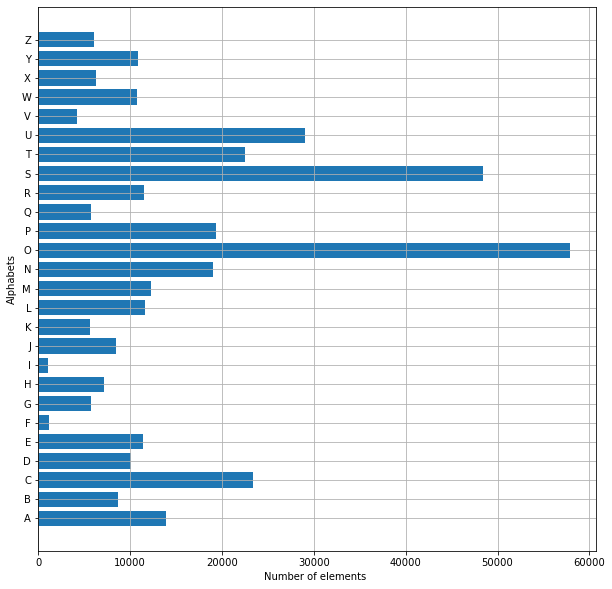

In [2]:
#All the lables (y) are floats, so we cast them to int and map them -
#with the chars in the alphabet
char_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}
y_int = np.int0(y)
print(y_int)
#Count how many times each char occurs
char_count = np.zeros(26, dtype='int')

[1,1,1,0,0,0,0,0,0,0,0,0,0]
for i in y_int:
    char_count[i] += 1

#List of all chars in alphabet
alphabets = []
for i in char_dict.values():
    alphabets.append(i)

#Show distribution of alphabets
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(alphabets, char_count)
plt.xlabel("Number of elements ")
plt.ylabel("Alphabets")
plt.grid()
plt.show()

#-------------------------------------------------------------------------------------------

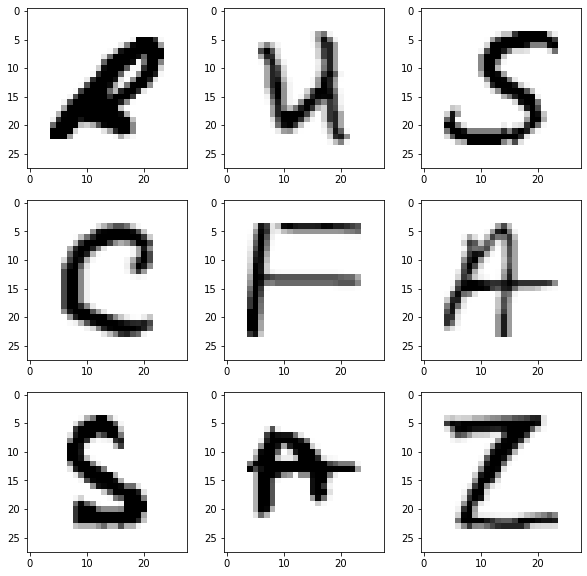

In [3]:
#Shuffle the images in the training data so images are displayed randomly
shuff_img_data = shuffle(train_x[:100])
#Plot 9 images in 3x3 shape so we can see them
fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()
#Sets the pixel threshold for the images so that they will be displayed similarly
for i in range(9):
    _, shu = cv2.threshold(shuff_img_data[i], 30, 200, cv2.THRESH_BINARY)
#imshow displays each of the image data as images in the 28x28 pixels format
    axes[i].imshow(np.reshape(shuff_img_data[i], (28,28)), cmap="Greys")
plt.show()

#-------------------------------------------------------------------------------------------


In [4]:
#Reshape the training and test data so we can put it in the model
train_X = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
print("New shape of train data: ", train_X.shape)

test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)
print("New shape of test data: ", test_X.shape)

#Convert float values to categorical values for each char in alphabet -
# therefore num_classes = 26
#Creates a binary matrix representation of the labels
train_Y = keras.utils.np_utils.to_categorical(train_y, num_classes = 26, dtype='int')
print("New shape of train labels: ", train_Y.shape)

test_Y = keras.utils.np_utils.to_categorical(test_y, num_classes = 26, dtype='int')
print("New shape of test labels: ", test_Y.shape)

New shape of train data:  (297960, 28, 28, 1)
New shape of test data:  (74490, 28, 28, 1)
New shape of train labels:  (297960, 26)
New shape of test labels:  (74490, 26)
